In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_cm_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        48.8098 (44.5646, 54.5976) (44.2575, 54.1065)  9.8490 (Jnode 202)\n',
 't_n104        31.5301 (28.4320, 33.9064) (28.5382, 33.9898)  5.4516 (Jnode 201)\n',
 't_n105        30.6084 (27.5810, 32.9105) (27.7669, 33.0779)  5.3110 (Jnode 200)\n',
 't_n106        27.5931 (24.8201, 29.8479) (24.9786, 29.9643)  4.9857 (Jnode 199)\n',
 't_n107        26.8476 (24.1522, 29.0753) (24.2370, 29.1427)  4.9057 (Jnode 198)\n',
 't_n108        25.3827 (22.8220, 27.5968) (22.8989, 27.6685)  4.7696 (Jnode 197)\n',
 't_n109        12.3886 (11.1859, 14.1596) (11.0665, 13.9818)  2.9153 (Jnode 196)\n',
 't_n110        12.2836 (11.0970, 14.0365) (10.9783, 13.8620)  2.8837 (Jnode 195)\n',
 't_n111        11.9396 (10.8007, 13.6486) (10.7320, 13.5291)  2.7971 (Jnode 194)\n',
 't_n112        11.5171 (10.4258, 13.1636) (10.3218, 12.9902)  2.6684 (Jnode 193)\n',
 't_n113        10.9481 ( 9.9437, 12.5253) ( 9.8314, 12.3352)  2.5038 (Jnode 192)\n',
 't_n114         7.4000 ( 6.5168,  8.6036) ( 6.4294,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[48.8098,
 31.5301,
 30.6084,
 27.5931,
 26.8476,
 25.3827,
 12.3886,
 12.2836,
 11.9396,
 11.5171,
 10.9481,
 7.4,
 4.3572,
 2.5283,
 2.0666,
 8.242,
 7.0689,
 11.4353,
 7.17,
 10.9846,
 8.7693,
 7.129,
 5.8882,
 10.6841,
 10.0782,
 2.7618,
 11.8093,
 10.7073,
 8.2995,
 6.6568,
 7.3273,
 6.6678,
 5.5745,
 5.3618,
 23.7945,
 19.175,
 25.7004,
 23.6533,
 22.1408,
 18.4824,
 9.9076,
 17.795,
 15.6535,
 13.9159,
 11.8819,
 21.5654,
 19.9304,
 5.3155,
 2.3958,
 28.9636,
 27.4269,
 25.0028,
 24.1921,
 25.9716,
 17.9963,
 21.7787,
 17.5918,
 30.6703,
 28.9239,
 26.4609,
 25.1063,
 21.4705,
 14.2394,
 19.1386,
 26.0862,
 8.2935,
 26.2899,
 35.8606,
 35.0246,
 34.3547,
 32.8208,
 30.4089,
 29.1062,
 28.1072,
 26.9149,
 24.0661,
 20.9576,
 17.5937,
 24.4311,
 23.068,
 18.4687,
 20.8583,
 26.4284,
 24.395,
 22.5604,
 19.3079,
 13.2438,
 24.9618,
 22.4151,
 19.8227,
 29.028,
 27.6269,
 26.2825,
 23.373,
 17.3813,
 26.0514,
 17.8288,
 14.5073,
 5.7783,
 34.8093,
 30.2167]

In [7]:
lower_ci_iqtree

[4.5976,
 3.9064,
 2.9105,
 9.8479,
 9.0753,
 7.5968,
 4.1596,
 4.0365,
 3.6486,
 3.1636,
 0.9437,
 0.5168,
 0.2079,
 0.3693,
 0.3896,
 0.1311,
 0.9628,
 3.081,
 0.8426,
 0.9166,
 0.6615,
 0.9848,
 0.5249,
 0.5231,
 0.9299,
 0.7436,
 3.5158,
 0.5652,
 0.0287,
 0.3871,
 0.1921,
 0.5605,
 0.56,
 0.9403,
 6.0643,
 2.0858,
 7.911,
 5.9306,
 4.4719,
 1.1193,
 0.6366,
 0.6335,
 8.6932,
 7.0108,
 0.0158,
 4.059,
 2.6399,
 0.5973,
 0.0716,
 1.2405,
 9.8087,
 7.6839,
 7.0596,
 8.4441,
 1.655,
 4.7123,
 1.0064,
 3.0182,
 1.2643,
 8.9544,
 7.7066,
 4.4476,
 8.5684,
 2.3534,
 8.7836,
 0.6438,
 9.1146,
 7.9033,
 6.8349,
 6.0544,
 4.3087,
 2.0439,
 0.8098,
 9.871,
 8.7595,
 6.2201,
 3.4625,
 0.5011,
 6.521,
 5.2602,
 1.2886,
 3.3148,
 8.3162,
 6.4899,
 4.8745,
 2.0328,
 6.9541,
 6.9883,
 4.7411,
 2.4846,
 0.7626,
 9.4915,
 8.3227,
 5.873,
 0.829,
 8.2371,
 1.0774,
 7.8876,
 0.3617,
 6.9712,
 2.8428]

In [8]:
upper_ci_iqtree

[44.2575,
 28.5382,
 27.7669,
 24.9786,
 24.237,
 22.8989,
 11.0665,
 10.9783,
 10.732,
 10.3218,
 12.5253,
 8.6036,
 4.767,
 2.7619,
 2.9012,
 9.6067,
 8.3452,
 10.2184,
 8.888,
 12.5619,
 10.167,
 8.4443,
 7.5763,
 12.3386,
 11.6934,
 3.9053,
 10.5361,
 12.2605,
 9.6881,
 7.9624,
 8.3138,
 7.6567,
 6.5605,
 7.2869,
 21.3224,
 16.0219,
 23.1326,
 21.1668,
 19.5976,
 15.5694,
 13.1659,
 14.7538,
 12.3017,
 10.8032,
 14.9103,
 18.8255,
 17.1592,
 8.0927,
 4.0536,
 26.1367,
 24.6442,
 21.9856,
 21.0085,
 23.0428,
 13.1832,
 18.2739,
 13.5395,
 27.7338,
 26.0658,
 23.4992,
 22.1458,
 18.3059,
 10.7054,
 15.8421,
 22.9397,
 12.7316,
 22.9603,
 34.3414,
 33.7847,
 33.2436,
 32.26,
 28.9541,
 27.3763,
 26.3548,
 25.0234,
 21.7499,
 18.2857,
 14.2988,
 22.2727,
 20.729,
 15.3366,
 18.2547,
 24.5241,
 22.2498,
 20.2497,
 16.8024,
 10.4209,
 22.9803,
 20.0733,
 17.1389,
 27.2505,
 25.6074,
 24.0959,
 20.4559,
 13.0497,
 23.6455,
 14.5384,
 10.9875,
 8.4443,
 32.9848,
 26.7862]

In [9]:
file_LG = open("LG_cm_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
# import matplotlib.pyplot as plt
# import numpy as np
# 
# # # Example data
# # # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# # posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# # 
# # # Credible intervals for MCMCtree
# # lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# # upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# # 
# # # Credible intervals for McmcDate
# # lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]
# 
# # Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [All calibrations]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_all.png')

In [11]:
posterior_mean_baseml

[48.7087,
 31.7484,
 30.1242,
 27.1066,
 26.0848,
 23.8496,
 12.8507,
 12.6697,
 11.9996,
 11.3101,
 10.6009,
 7.1093,
 4.3468,
 2.5548,
 2.1749,
 8.0715,
 6.6163,
 11.3017,
 6.928,
 10.6832,
 8.3919,
 6.6707,
 6.1329,
 10.6084,
 9.7939,
 3.2024,
 11.9266,
 10.5593,
 8.1686,
 6.476,
 7.2916,
 6.4036,
 5.1667,
 5.9048,
 22.0288,
 18.1475,
 24.5567,
 22.2315,
 20.2287,
 16.6812,
 9.5309,
 16.4733,
 14.0075,
 12.1018,
 9.9942,
 20.1787,
 18.2757,
 5.9461,
 2.7873,
 27.222,
 24.8177,
 21.5486,
 21.1171,
 23.5896,
 16.0006,
 19.4487,
 14.8455,
 30.5976,
 28.4147,
 25.363,
 23.3337,
 19.8778,
 14.0983,
 17.1425,
 24.7805,
 9.8438,
 25.1239,
 38.4648,
 36.6266,
 34.945,
 32.8472,
 29.6791,
 27.8627,
 26.263,
 24.2859,
 20.9568,
 17.639,
 14.5292,
 21.4836,
 19.8452,
 15.552,
 16.9661,
 24.1904,
 21.708,
 19.3858,
 16.3708,
 11.4577,
 21.9784,
 19.4373,
 16.6354,
 27.2674,
 24.9886,
 22.6549,
 19.2918,
 13.3264,
 23.422,
 17.3514,
 13.4212,
 5.5687,
 37.0652,
 31.6674]

In [12]:
posterior_mean_iqtree

[48.8098,
 31.5301,
 30.6084,
 27.5931,
 26.8476,
 25.3827,
 12.3886,
 12.2836,
 11.9396,
 11.5171,
 10.9481,
 7.4,
 4.3572,
 2.5283,
 2.0666,
 8.242,
 7.0689,
 11.4353,
 7.17,
 10.9846,
 8.7693,
 7.129,
 5.8882,
 10.6841,
 10.0782,
 2.7618,
 11.8093,
 10.7073,
 8.2995,
 6.6568,
 7.3273,
 6.6678,
 5.5745,
 5.3618,
 23.7945,
 19.175,
 25.7004,
 23.6533,
 22.1408,
 18.4824,
 9.9076,
 17.795,
 15.6535,
 13.9159,
 11.8819,
 21.5654,
 19.9304,
 5.3155,
 2.3958,
 28.9636,
 27.4269,
 25.0028,
 24.1921,
 25.9716,
 17.9963,
 21.7787,
 17.5918,
 30.6703,
 28.9239,
 26.4609,
 25.1063,
 21.4705,
 14.2394,
 19.1386,
 26.0862,
 8.2935,
 26.2899,
 35.8606,
 35.0246,
 34.3547,
 32.8208,
 30.4089,
 29.1062,
 28.1072,
 26.9149,
 24.0661,
 20.9576,
 17.5937,
 24.4311,
 23.068,
 18.4687,
 20.8583,
 26.4284,
 24.395,
 22.5604,
 19.3079,
 13.2438,
 24.9618,
 22.4151,
 19.8227,
 29.028,
 27.6269,
 26.2825,
 23.373,
 17.3813,
 26.0514,
 17.8288,
 14.5073,
 5.7783,
 34.8093,
 30.2167]

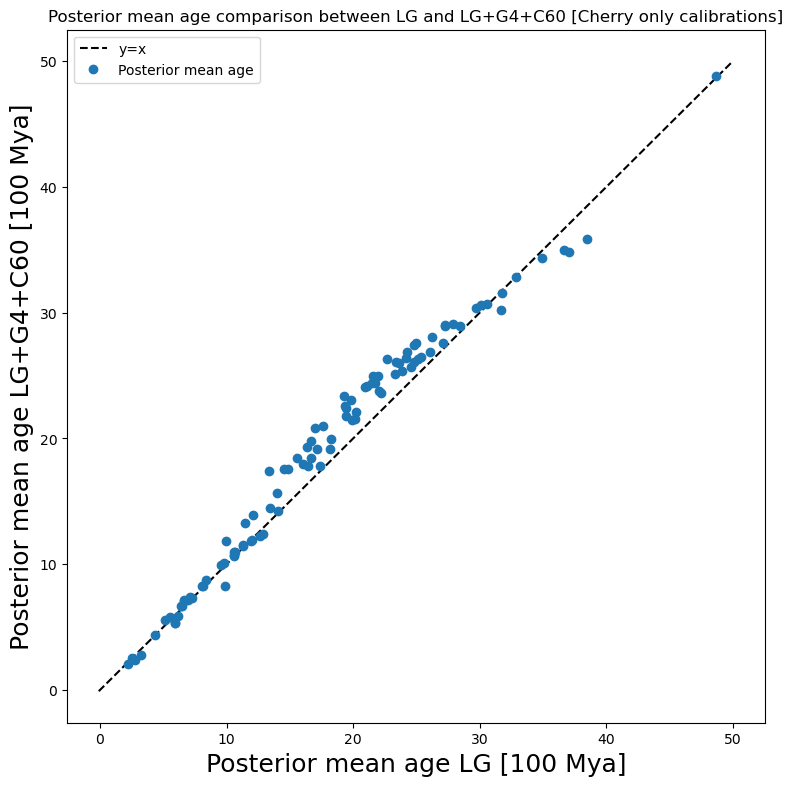

In [15]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [Cherry only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_co_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4+C20]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4+C60 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_C20_all_scatter.png')